In [1]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

import sklearn.metrics as sm
from sklearn.metrics import mean_squared_error

import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from numpy import *
import seaborn as sns

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
filename="weather_ex_21.csv"
df = pd.read_csv(filename,parse_dates=["Date"])
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour
df["minute"]=df['Date'].dt.minute

Date=pd.period_range(start="2021-10-08 22:20:00",end= "2021-10-26 22:00:00", freq="20T")
df['Date'].duplicated().value_counts()
df=df.drop_duplicates( ["Date"] )
features_considered=["Temp('C)",'Press(hPa)','Humi(%)']

features=df[features_considered]
features= features.fillna(method='pad')
features["Date"]=Date
features.set_index('Date', inplace=True)
round(features,2)

,Temp('C),Press(hPa),Humi(%)
Date,,,
2021-10-08 22:20,21.8,1016.45,76
2021-10-08 22:40,21.8,1016.54,76
2021-10-08 23:00,21.3,1016.70,80
2021-10-08 23:20,21.3,1016.95,80
2021-10-08 23:40,21.4,1016.99,80
...,...,...,...
2021-10-26 20:40,17.2,1013.17,62
2021-10-26 21:00,17.0,1013.08,63
2021-10-26 21:20,16.9,1013.02,64


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

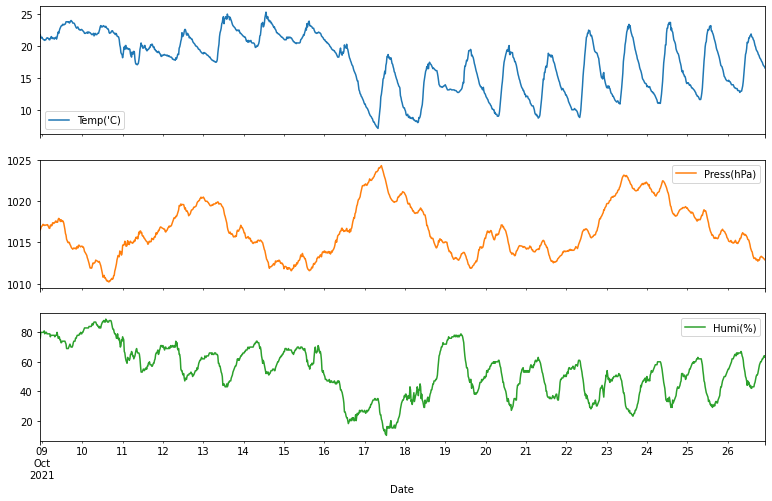

In [3]:
features.plot(subplots=True,figsize = (13,8))

In [4]:
filename_2="weather_10_8_28.csv"
df_2=pd.read_csv(filename_2,parse_dates=["Date"])
df_2['month'] = df_2['Date'].dt.month
df_2['day'] = df_2['Date'].dt.day
df_2['hour'] = df_2['Date'].dt.hour
df_2["minute"]=df_2['Date'].dt.minute
df_2["Rain"]=df_2["누적강수량(mm)"]

df_2=df_2[ (df_2["minute"]==0) | (df_2["minute"]==20) | (df_2["minute"]==40)]
#df_2.set_index('Date', inplace=True)

features_considered_2=["Temp('C)",'Press(hPa)','Humi(%)',]

features_2=df_2[features_considered_2]
features_2["Date"]=Date
features_2.set_index('Date', inplace=True)
features_2

C:\Users\cho99\AppData\Local\Temp/ipykernel_7848/1904494286.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_2["Date"]=Date


,Temp('C),Press(hPa),Humi(%)
Date,,,
2021-10-08 22:20,18.7,1012.3,91.6
2021-10-08 22:40,18.8,1012.5,91.3
2021-10-08 23:00,18.8,1012.6,91.2
2021-10-08 23:20,18.9,1012.8,90.8
2021-10-08 23:40,18.9,1012.9,90.0
...,...,...,...
2021-10-26 20:40,13.8,1008.8,76.5
2021-10-26 21:00,13.6,1008.8,79.1
2021-10-26 21:20,13.3,1008.7,79.6


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

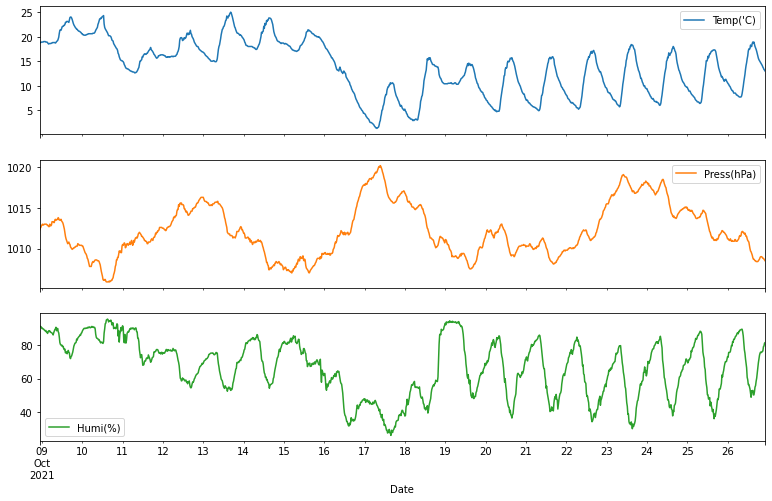

In [5]:
features_2.plot(subplots=True,figsize = (13,8))

### 아두이노의 정확도 측정

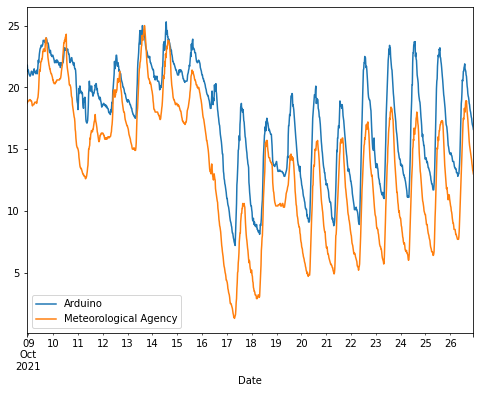

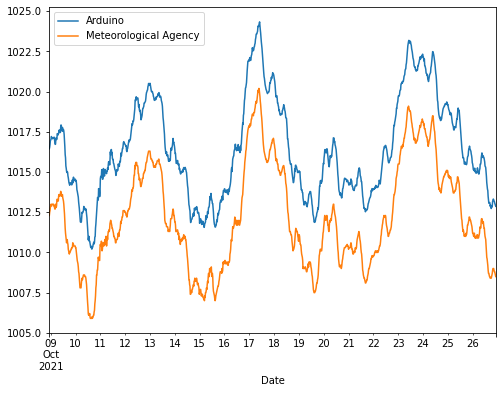

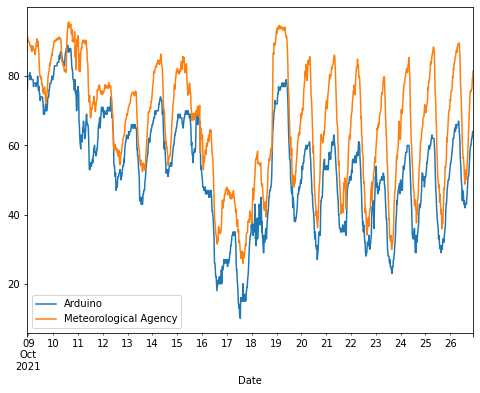

In [6]:
d=pd.DataFrame(features,)

d=d.rename(columns={"Temp('C)":"Temp_arduino",'Press(hPa)':"Press_arduino",'Humi(%)':"Humi_arduino"})
d["Temp_MA"]=features_2["Temp('C)"]
d["Press_MA"]=features_2["Press(hPa)"]
d["Humi_MA"]=features_2["Humi(%)"]

d_T=d[["Temp_arduino","Temp_MA"]]
d_P=d[["Press_arduino","Press_MA"]]
d_H=d[["Humi_arduino","Humi_MA"]]


d_T.plot()
plt.legend(["Arduino", "Meteorological Agency"])
d_P.plot()
plt.legend(["Arduino", "Meteorological Agency"])
d_H.plot()
plt.legend(["Arduino", "Meteorological Agency"])

In [7]:
rmse_T = np.sqrt(mean_squared_error(round(d_T["Temp_MA"],1), round(d_T["Temp_arduino"],1) ))

rmse_P = np.sqrt(mean_squared_error(round(d_P["Press_MA"],1), round(d_P["Press_arduino"],1) ))

rmse_H = np.sqrt(mean_squared_error(round(d_H["Humi_MA"],1), round(d_H["Humi_arduino"],1) ))

print("온도의 RMSE:",round(rmse_T,2))
print("기압의 RMSE:",round(rmse_P,2))
print("습도의 RMSE:",round(rmse_H,2))    

온도의 RMSE: 4.26
기압의 RMSE: 4.25
습도의 RMSE: 14.64


### 정상성 확인 (단위근 검정)

In [8]:
def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
print("----------Temp('C)----------")
adf_test(features["Temp('C)"])
print("----------Press(hPa)----------")
adf_test(features["Press(hPa)"])
print("----------Humi(%)----------")
adf_test(features["Humi(%)"])

----------Temp('C)----------
ADF Statistics: -5.732739
p-value: 0.000001
Critical values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
----------Press(hPa)----------
ADF Statistics: -2.239025
p-value: 0.192387
Critical values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
----------Humi(%)----------
ADF Statistics: -3.403065
p-value: 0.010855
Critical values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [9]:
features_diff = features.diff().dropna() #차분 

In [10]:
print("----------Temp('C)----------")
adf_test(features_diff["Temp('C)"])
print("----------Press(hPa)----------")
adf_test(features_diff["Press(hPa)"])
print("----------Humi(%)----------")
adf_test(features_diff["Humi(%)"])

----------Temp('C)----------
ADF Statistics: -9.372960
p-value: 0.000000
Critical values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
----------Press(hPa)----------
ADF Statistics: -6.498122
p-value: 0.000000
Critical values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
----------Humi(%)----------
ADF Statistics: -8.689255
p-value: 0.000000
Critical values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


### 시차 결정

In [11]:
k=1000

forecasting_model = VAR(features)
results_aic = []
for p in range(1,k):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

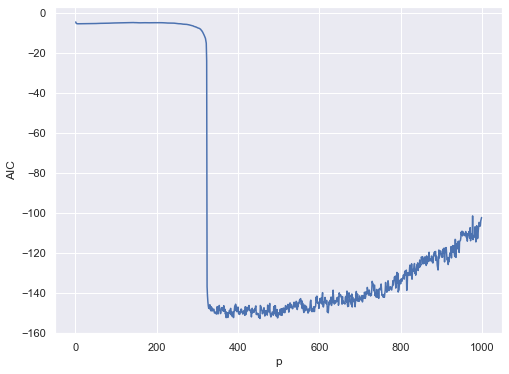

In [12]:
sns.set()
plt.plot(list(np.arange(1,k)), results_aic)
plt.xlabel("p")
plt.ylabel("AIC")
plt.show()

In [13]:
p=results_aic.index(min(results_aic))
p

453

### 예측하기

In [14]:
p= 480
train = features.iloc[:-144,:] 
test = features.iloc[-144:,:]  
test_2 = features_2.iloc[-144:,:]

forecasting_model = VAR(features)
laaged_values = train.values[:] 

results = forecasting_model.fit(p) 
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=144), 
                        index = test.index, 
                        columns= ['T','Press','Humi'])

### 기상청 데이터와 예측값 비교

<AxesSubplot:xlabel='Date'>

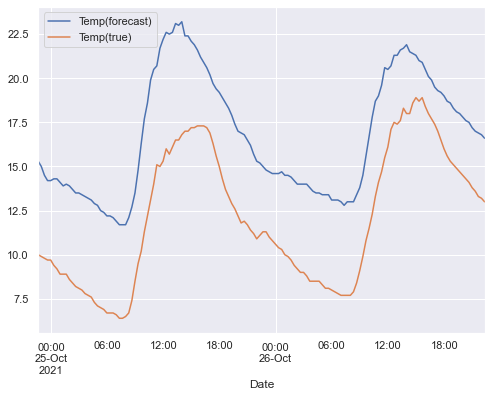

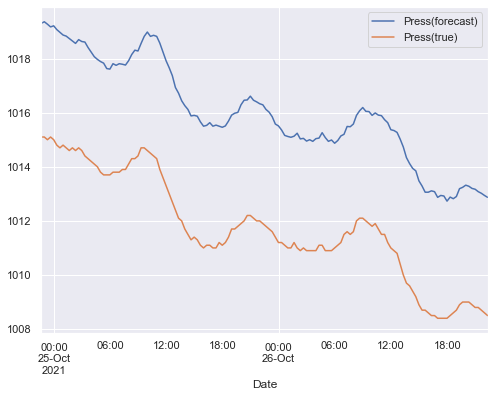

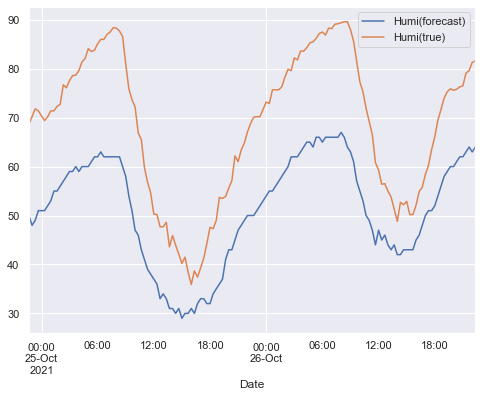

In [15]:
Temp=pd.DataFrame({"Temp(forecast)":forecast["T"],"Temp(true)":test_2["Temp('C)"]})
Press=pd.DataFrame({"Press(forecast)":forecast["Press"],"Press(true)":test_2["Press(hPa)"]})
Humi=pd.DataFrame({"Humi(forecast)":forecast["Humi"],"Humi(true)":test_2["Humi(%)"]})
Temp.plot()
Press.plot()
Humi.plot()

In [16]:
rmse_Temp = np.sqrt(mean_squared_error(Temp["Temp(forecast)"],test_2["Temp('C)"]))
rmse_Press = np.sqrt(mean_squared_error(Press["Press(forecast)"],test_2["Press(hPa)"]))
rmse_Humi = np.sqrt(mean_squared_error(Humi["Humi(forecast)"],test_2["Humi(%)"]))

print("온도의 RMSE값 :",round(rmse_Temp,2))
print("기압의 RMSE값:",round(rmse_Press,2))
print("습도의 RMSE값:",round(rmse_Humi,2))

온도의 RMSE값 : 4.78
기압의 RMSE값: 4.26
습도의 RMSE값: 18.05
